# Přidání popisků do grafu

Nejprve musíme provést import všech potřebných knihoven z projektu Incanter

In [3]:
(ns simple-plot
  (:use (incanter core stats charts symbolic optimize)))

Pomocná funkce, která nám umožní zjednodušit zobrazení grafů v Jupyter Notebooku

In [4]:
(defn display
    [chart]
    (.createBufferedImage chart 640 480))

#'simple-plot/display

Podívejme se ještě na další zajímavou vlastnost Incanteru (kterou opět nalezneme i v Matplotlibu i dalších podobných knihovnách). Do grafu je totiž možné přidat popisky, dokonce s ukazateli (šipkami) na přesné místo, ke kterému se popisek vztahuje. Popisky se do grafu přidají funkcí add-pointer, které je nutné předat souřadnice bodu, na který bude šipka ukazovat, a taktéž text, který se má v grafu zobrazit. V následujícím příkladu jsem nejprve provedl pomocný výpočet x-ové souřadnice bodů ±5π/2 a následně je již vynesení bodů s ukazateli do grafu snadné:

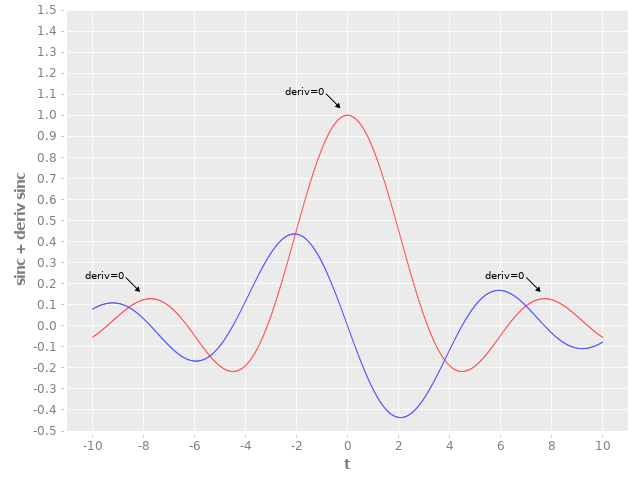

In [7]:
(def pi java.lang.Math/PI)
 
(defn sinc
    [t]
    (/ (sin t) t))
 
(def d0 (/ (* pi 5) 2))

(display
  (doto (function-plot sinc -10 10 :x-label "t" :y-label "sinc + deriv sinc")
        (set-y-range -1/2 3/2)
        (add-function (derivative sinc) -10 10)
        (add-pointer 0 1 :text "deriv=0")
        (add-pointer d0 (sinc d0) :text "deriv=0")
        (add-pointer (- d0) (sinc (- d0)) :text "deriv=0")))